In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings
from pandas import read_csv
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [78]:
crime_df=pd.read_csv("data.csv",parse_dates=['date'])
crime_df

unique_key                      date                primary_type  \
0          11254300 2014-05-10 13:00:00+00:00          DECEPTIVE PRACTICE   
1          11500786 2017-12-27 12:00:00+00:00          DECEPTIVE PRACTICE   
2          11518563 2015-12-01 00:00:00+00:00  OFFENSE INVOLVING CHILDREN   
3          11695742 2019-05-22 12:30:00+00:00               OTHER OFFENSE   
4          11710432 2019-06-02 21:38:00+00:00           CRIMINAL TRESPASS   
...             ...                       ...                         ...   
3167031     9755434 2014-08-27 23:37:00+00:00               OTHER OFFENSE   
3167032     7482732 2010-04-29 10:30:00+00:00               OTHER OFFENSE   
3167033     9702697 2014-07-17 21:33:00+00:00               OTHER OFFENSE   
3167034     9326573 2013-09-20 20:00:00+00:00               OTHER OFFENSE   
3167035     9300186 2013-09-09 05:00:00+00:00               OTHER OFFENSE   

                                 description    location_description  arrest  \
0        FINANCIAL IDENTITY THEFT OVER $ 300                     NaN   False   
1             FINAN EXPLOIT-ELDERLY/DISABLED               RESIDENCE   False   
2              AGG CRIM SEX ABUSE FAM MEMBER               APARTMENT   False   
3             HARASSMENT BY ELECTRONIC MEANS               RESIDENCE   False   
4                                 TO VEHICLE  DRIVEWAY - RESIDENTIAL   False   
...                                      ...                     ...     ...   
3167031                OTHER VEHICLE OFFENSE                  STREET   False   
3167032                OTHER VEHICLE OFFENSE                  STREET   False   
3167033                OTHER VEHICLE OFFENSE                  STREET   False   
3167034                OTHER VEHICLE OFFENSE                  STREET   False   
3167035                OTHER VEHICLE OFFENSE                  STREET   False   

         domestic  beat  community_area  year                       location  
0           False   533            54.0  2014                            NaN  
1           False  2221            72.0  2017                            NaN  
2            True   433            55.0  2015                            NaN  
3           False  1622            11.0  2019  (41.969398556, -87.784366127)  
4           False  1621            12.0  2019  (41.984941611, -87.751467953)  
...           ...   ...             ...   ...                            ...  
3167031     False  2022            77.0  2014  (41.984139079, -87.656628965)  
3167032      True  2012            77.0  2010  (41.989334479, -87.674667806)  
3167033     False  2023            77.0  2014  (41.976413776, -87.653776017)  
3167034     False  2433            77.0  2013  (41.991404284, -87.656853651)  
3167035     False  2023            77.0  2013  (41.980919411, -87.655110993)  

[3167036 rows x 11 columns]

In [81]:
#rename column unique_key as ID
crime_df=crime_df.rename(columns={"unique_key":"ID"})


In [82]:
crime_df.head()

ID                      date                primary_type  \
0  11254300 2014-05-10 13:00:00+00:00          DECEPTIVE PRACTICE   
1  11500786 2017-12-27 12:00:00+00:00          DECEPTIVE PRACTICE   
2  11518563 2015-12-01 00:00:00+00:00  OFFENSE INVOLVING CHILDREN   
3  11695742 2019-05-22 12:30:00+00:00               OTHER OFFENSE   
4  11710432 2019-06-02 21:38:00+00:00           CRIMINAL TRESPASS   

                           description    location_description  arrest  \
0  FINANCIAL IDENTITY THEFT OVER $ 300                     NaN   False   
1       FINAN EXPLOIT-ELDERLY/DISABLED               RESIDENCE   False   
2        AGG CRIM SEX ABUSE FAM MEMBER               APARTMENT   False   
3       HARASSMENT BY ELECTRONIC MEANS               RESIDENCE   False   
4                           TO VEHICLE  DRIVEWAY - RESIDENTIAL   False   

   domestic  beat  community_area  year                       location  
0     False   533            54.0  2014                            NaN  
1     False  2221            72.0  2017                            NaN  
2      True   433            55.0  2015                            NaN  
3     False  1622            11.0  2019  (41.969398556, -87.784366127)  
4     False  1621            12.0  2019  (41.984941611, -87.751467953)

In [88]:
crime_df.to_csv("data.csv")

In [83]:
#create a month column
def month(x):
    return x.strftime("%B")
crime_df['Month'] = crime_df['date'].apply(month)

In [84]:
#create a day column
def day(x):
    return x.strftime("%A")
crime_df['Day'] = crime_df['date'].apply(day)

In [85]:
#create a year column
def year(x):
    return x.strftime("%Y")
crime_df['year'] = crime_df['date'].apply(year)

In [86]:
#create a hours column
def hours(x):
    return x.strftime("%H")
crime_df['hours'] = crime_df['date'].apply(hours)

In [87]:
#conver hours column as integer
crime_df["hours"]=pd.to_numeric(crime_df.hours, errors='coerce')


In [89]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167036 entries, 0 to 3167035
Data columns (total 14 columns):
 #   Column                Dtype              
---  ------                -----              
 0   ID                    int64              
 1   date                  datetime64[ns, UTC]
 2   primary_type          object             
 3   description           object             
 4   location_description  object             
 5   arrest                bool               
 6   domestic              bool               
 7   beat                  int64              
 8   community_area        float64            
 9   year                  object             
 10  location              object             
 11  Month                 object             
 12  Day                   object             
 13  hours                 int64              
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(3), object(7)
memory usage: 296.0+ MB


In [50]:
crime_df.columns

Index(['date', 'block', 'primary_type', 'description', 'location_description',
       'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area',
       'year', 'location', 'hours', 'Customhrs', 'Month', 'Day'],
      dtype='object')

In [90]:
crime_df.isnull().sum()

ID                          0
date                        0
primary_type                0
description                 0
location_description     7534
arrest                      0
domestic                    0
beat                        0
community_area            397
year                        0
location                53436
Month                       0
Day                         0
hours                       0
dtype: int64

In [91]:
 
crime_df['date'] = crime_df['date'].dt.strftime('%Y-%m-%d')

In [92]:
crime_df['date']= pd.to_datetime(crime_df['date'])
crime_df.head()

ID       date                primary_type  \
0  11254300 2014-05-10          DECEPTIVE PRACTICE   
1  11500786 2017-12-27          DECEPTIVE PRACTICE   
2  11518563 2015-12-01  OFFENSE INVOLVING CHILDREN   
3  11695742 2019-05-22               OTHER OFFENSE   
4  11710432 2019-06-02           CRIMINAL TRESPASS   

                           description    location_description  arrest  \
0  FINANCIAL IDENTITY THEFT OVER $ 300                     NaN   False   
1       FINAN EXPLOIT-ELDERLY/DISABLED               RESIDENCE   False   
2        AGG CRIM SEX ABUSE FAM MEMBER               APARTMENT   False   
3       HARASSMENT BY ELECTRONIC MEANS               RESIDENCE   False   
4                           TO VEHICLE  DRIVEWAY - RESIDENTIAL   False   

   domestic  beat  community_area  year                       location  \
0     False   533            54.0  2014                            NaN   
1     False  2221            72.0  2017                            NaN   
2      True   433            55.0  2015                            NaN   
3     False  1622            11.0  2019  (41.969398556, -87.784366127)   
4     False  1621            12.0  2019  (41.984941611, -87.751467953)   

      Month        Day  hours  
0       May   Saturday     13  
1  December  Wednesday     12  
2  December    Tuesday      0  
3       May  Wednesday     12  
4      June     Sunday     21

In [93]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167036 entries, 0 to 3167035
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   date                  datetime64[ns]
 2   primary_type          object        
 3   description           object        
 4   location_description  object        
 5   arrest                bool          
 6   domestic              bool          
 7   beat                  int64         
 8   community_area        float64       
 9   year                  object        
 10  location              object        
 11  Month                 object        
 12  Day                   object        
 13  hours                 int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 296.0+ MB


In [94]:
#set date column as index
crime_df.set_index("date", inplace=True)


In [95]:
crime_df.head()

ID                primary_type  \
date                                               
2014-05-10  11254300          DECEPTIVE PRACTICE   
2017-12-27  11500786          DECEPTIVE PRACTICE   
2015-12-01  11518563  OFFENSE INVOLVING CHILDREN   
2019-05-22  11695742               OTHER OFFENSE   
2019-06-02  11710432           CRIMINAL TRESPASS   

                                    description    location_description  \
date                                                                      
2014-05-10  FINANCIAL IDENTITY THEFT OVER $ 300                     NaN   
2017-12-27       FINAN EXPLOIT-ELDERLY/DISABLED               RESIDENCE   
2015-12-01        AGG CRIM SEX ABUSE FAM MEMBER               APARTMENT   
2019-05-22       HARASSMENT BY ELECTRONIC MEANS               RESIDENCE   
2019-06-02                           TO VEHICLE  DRIVEWAY - RESIDENTIAL   

            arrest  domestic  beat  community_area  year  \
date                                                       
2014-05-10   False     False   533            54.0  2014   
2017-12-27   False     False  2221            72.0  2017   
2015-12-01   False      True   433            55.0  2015   
2019-05-22   False     False  1622            11.0  2019   
2019-06-02   False     False  1621            12.0  2019   

                                 location     Month        Day  hours  
date                                                                   
2014-05-10                            NaN       May   Saturday     13  
2017-12-27                            NaN  December  Wednesday     12  
2015-12-01                            NaN  December    Tuesday      0  
2019-05-22  (41.969398556, -87.784366127)       May  Wednesday     12  
2019-06-02  (41.984941611, -87.751467953)      June     Sunday     21

In [96]:
#visualization of top 20 crimes
crime_order = crime_df['primary_type'].value_counts().iloc[:20].index
crime_order

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT',
       'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON'],
      dtype='object')

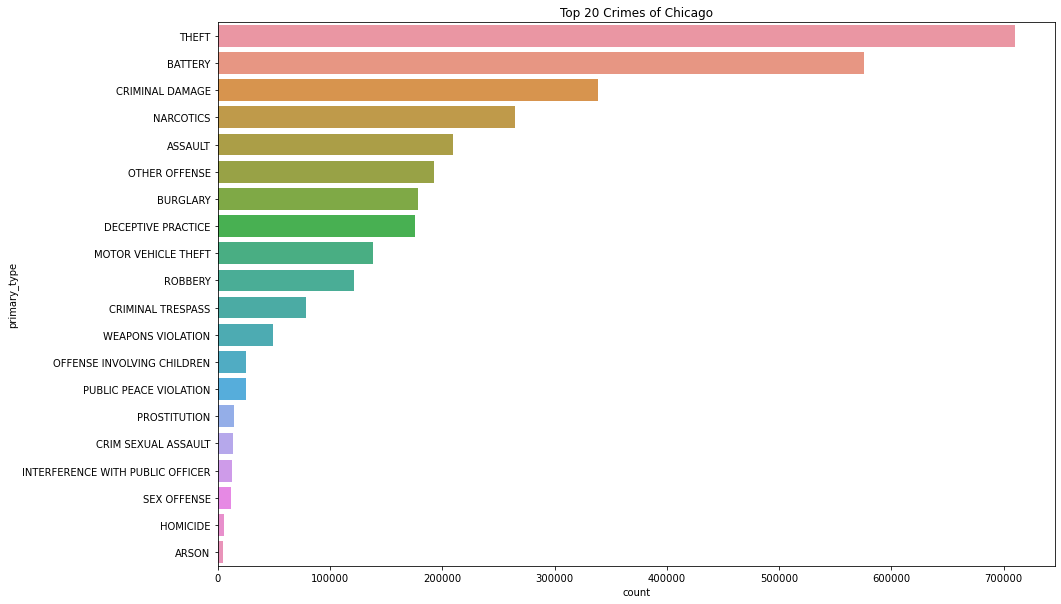

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(y='primary_type',data=crime_df,order=crime_order)
plt.title('Top 20 Crimes of Chicago')
plt.show()

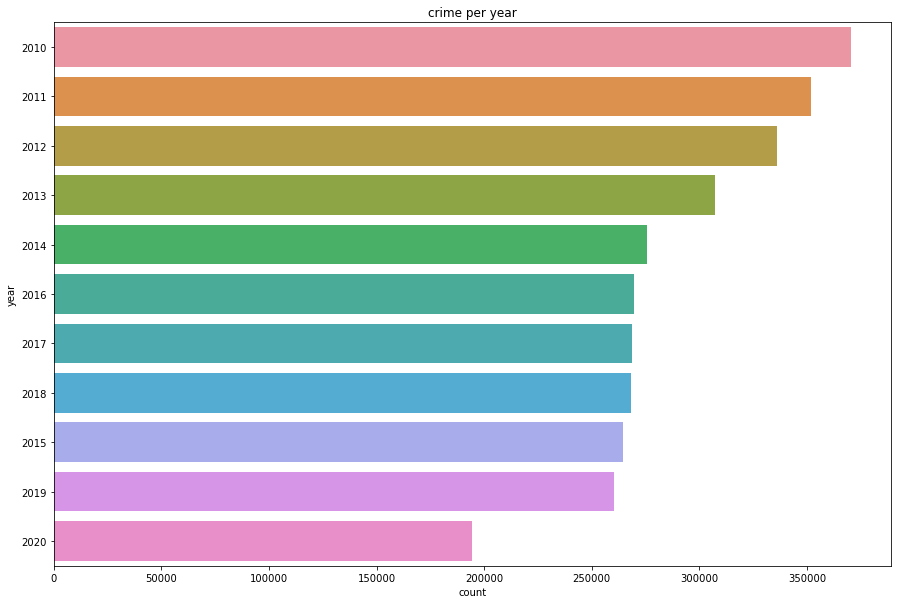

In [98]:
#visualization of crime count in year wise
crime_order_year = crime_df['year'].value_counts().index
plt.figure(figsize=(15,10))
sns.countplot(y='year',data=crime_df,order=crime_order_year)
plt.title('crime per year')
plt.show()

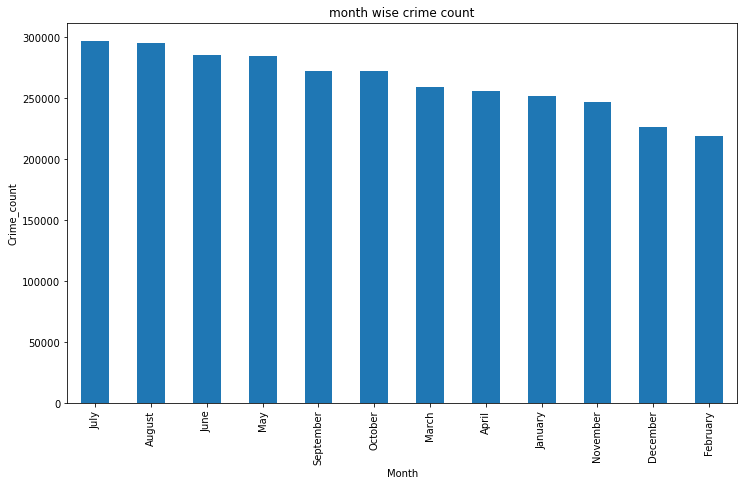

In [63]:
#visualization of crime count in Month wise
Month_crime_count=crime_df.groupby(by='Month').primary_type.count().sort_values(ascending=False)
plt.figure(figsize=(12,7))
plt.title('month wise crime count')
plt.ylabel('Crime_count')
plt.xlabel('Month')
Month_crime_count.plot.bar()
plt.show()

The figure we can see that months July, August has more crimes occuring.if any one plannng to visit this city, would be more conciouus



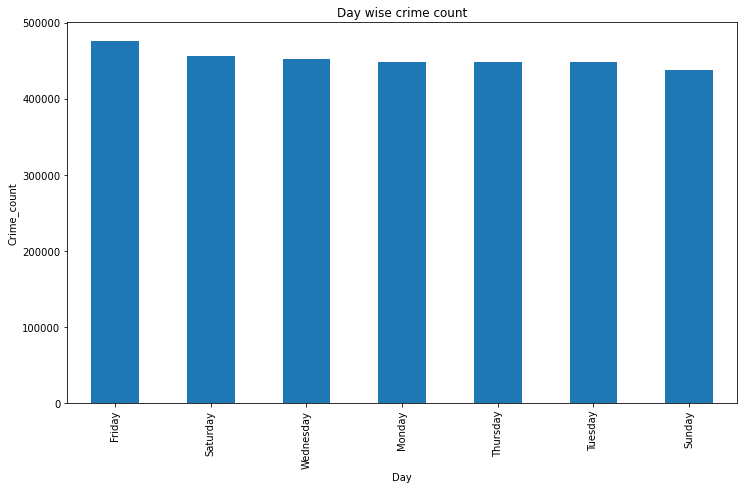

In [68]:
#visualization of crime count in day wise
Month_crime_count=crime_df.groupby(by='Day').primary_type.count().sort_values(ascending=False)
plt.figure(figsize=(12,7))
plt.title('Day wise crime count')
plt.ylabel('Crime_count')
plt.xlabel('Day')
Month_crime_count.plot.bar()
plt.show()

Here we can see that crime count on friday is slightly high compared to other days.

Remaining days has equal distribution of crime.

In [ ]:
#Visualizations of hourly occurrence of crime.
#convert  time intervals of a day in T1,T2,T3,T4,T5,T6
# T1: 12 AM TO 4 PM
# T2: 4 AM TO 8 AM
# T3: 8 AM TO 12 PM
#T4: 12 PM TO 4 PM
#T5: 4 PM TO 8 PM
#T6: 8 PM TO 12 AM

In [14]:
def customTemp(prTime):
    if prTime>0 and prTime<4 :
        return 'T1'
    elif prTime>4 and prTime<8 :
        return 'T2'
    elif prTime>8 and prTime<12 :
        return 'T3'
    elif prTime>12 and prTime<16 :
        return 'T4'
    elif prTime>16 and prTime<20 :
        return 'T5'
    else:
        return 'T6'
crime_df['Customhrs'] =crime_df['hours'].apply(customTemp)

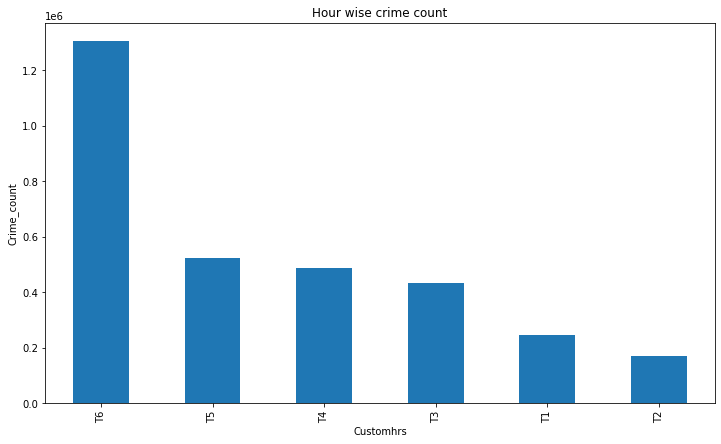

In [15]:
#visualization of crime count in hour wise
hour_crime_count=crime_df.groupby(by='Customhrs').primary_type.count().sort_values(ascending=False)
plt.figure(figsize=(12,7))
plt.title('Hour wise crime count')
plt.ylabel('Crime_count')
plt.xlabel('Hours')
hour_crime_count.plot.bar()
plt.show()

The above figure  T1 is from 12 am to 4 am, T2 is time from 4 am to 8 am, T3 from 8
am to 12 pm, T4 from 12 pm to 4 pm, T5 from 4 pm to 8 pm, T6 from 8 pm to 12 am.
 more number of crimes happening at night from 8 pm to 12 pm
The above visualization helps  to understand that residents of Chicago need to be safe
during nights.
    


In [17]:
#Create a pickle file for crime_df
with open("crime_df.pkl", "wb") as picklefile:
         pickle.dump(crime_df, picklefile)

In [3]:
crime_df=pd.read_pickle("crime_df.pkl")


In [100]:
Crime_Data_date = crime_df.pivot_table('ID', aggfunc = np.size, columns = 'primary_type', 
                                         index = crime_df.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

In [101]:
Crime_Data_date

primary_type  ARSON  ASSAULT  BATTERY  BURGLARY  \
2010-01-01        2       40      273        47   
2010-01-02        3       46      113        46   
2010-01-03        0       44      136        45   
2010-01-04        3       43      127        51   
2010-01-05        3       33      105        72   
...             ...      ...      ...       ...   
2020-11-30        0       33       93        14   
2020-12-01        2       36       80        16   
2020-12-02        1       34       78        14   
2020-12-03        1       36       57        11   
2020-12-04        1       36       89        16   

primary_type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
2010-01-01                                    0                   54   
2010-01-02                                    0                    4   
2010-01-03                                    0                    3   
2010-01-04                                    0                    4   
2010-01-05                                    0                    4   
...                                         ...                  ...   
2020-11-30                                    0                    0   
2020-12-01                                    0                    0   
2020-12-02                                    0                    0   
2020-12-03                                    0                    0   
2020-12-04                                    0                    0   

primary_type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
2010-01-01                 94                        3                 21   
2010-01-02                 68                        0                 13   
2010-01-03                 80                        0                 30   
2010-01-04                 76                        0                 24   
2010-01-05                 91                        0                 37   
...                       ...                      ...                ...   
2020-11-30                 36                        2                  6   
2020-12-01                 31                        2                  6   
2020-12-02                 48                        0                  8   
2020-12-03                 42                        2                  3   
2020-12-04                 50                        3                  6   

primary_type  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  PROSTITUTION  \
2010-01-01                    98  ...            104             7   
2010-01-02                    27  ...             66             4   
2010-01-03                    24  ...             62             5   
2010-01-04                    47  ...             70             5   
2010-01-05                    32  ...             59            17   
...                          ...  ...            ...           ...   
2020-11-30                    53  ...             29             0   
2020-12-01                    65  ...             25             0   
2020-12-02                    61  ...             19             0   
2020-12-03                    42  ...             20             0   
2020-12-04                    68  ...             29             0   

primary_type  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  RITUALISM  ROBBERY  \
2010-01-01                   0                       9          0       34   
2010-01-02                   0                       2          0       41   
2010-01-03                   0                       6          0       29   
2010-01-04                   0                       5          0       36   
2010-01-05                   0                       6          0       36   
...                        ...                     ...        ...      ...   
2020-11-30                   0                       1          0       14   
2020-12-01                   0                       0          0       21   
2020-12-02                   0                       0

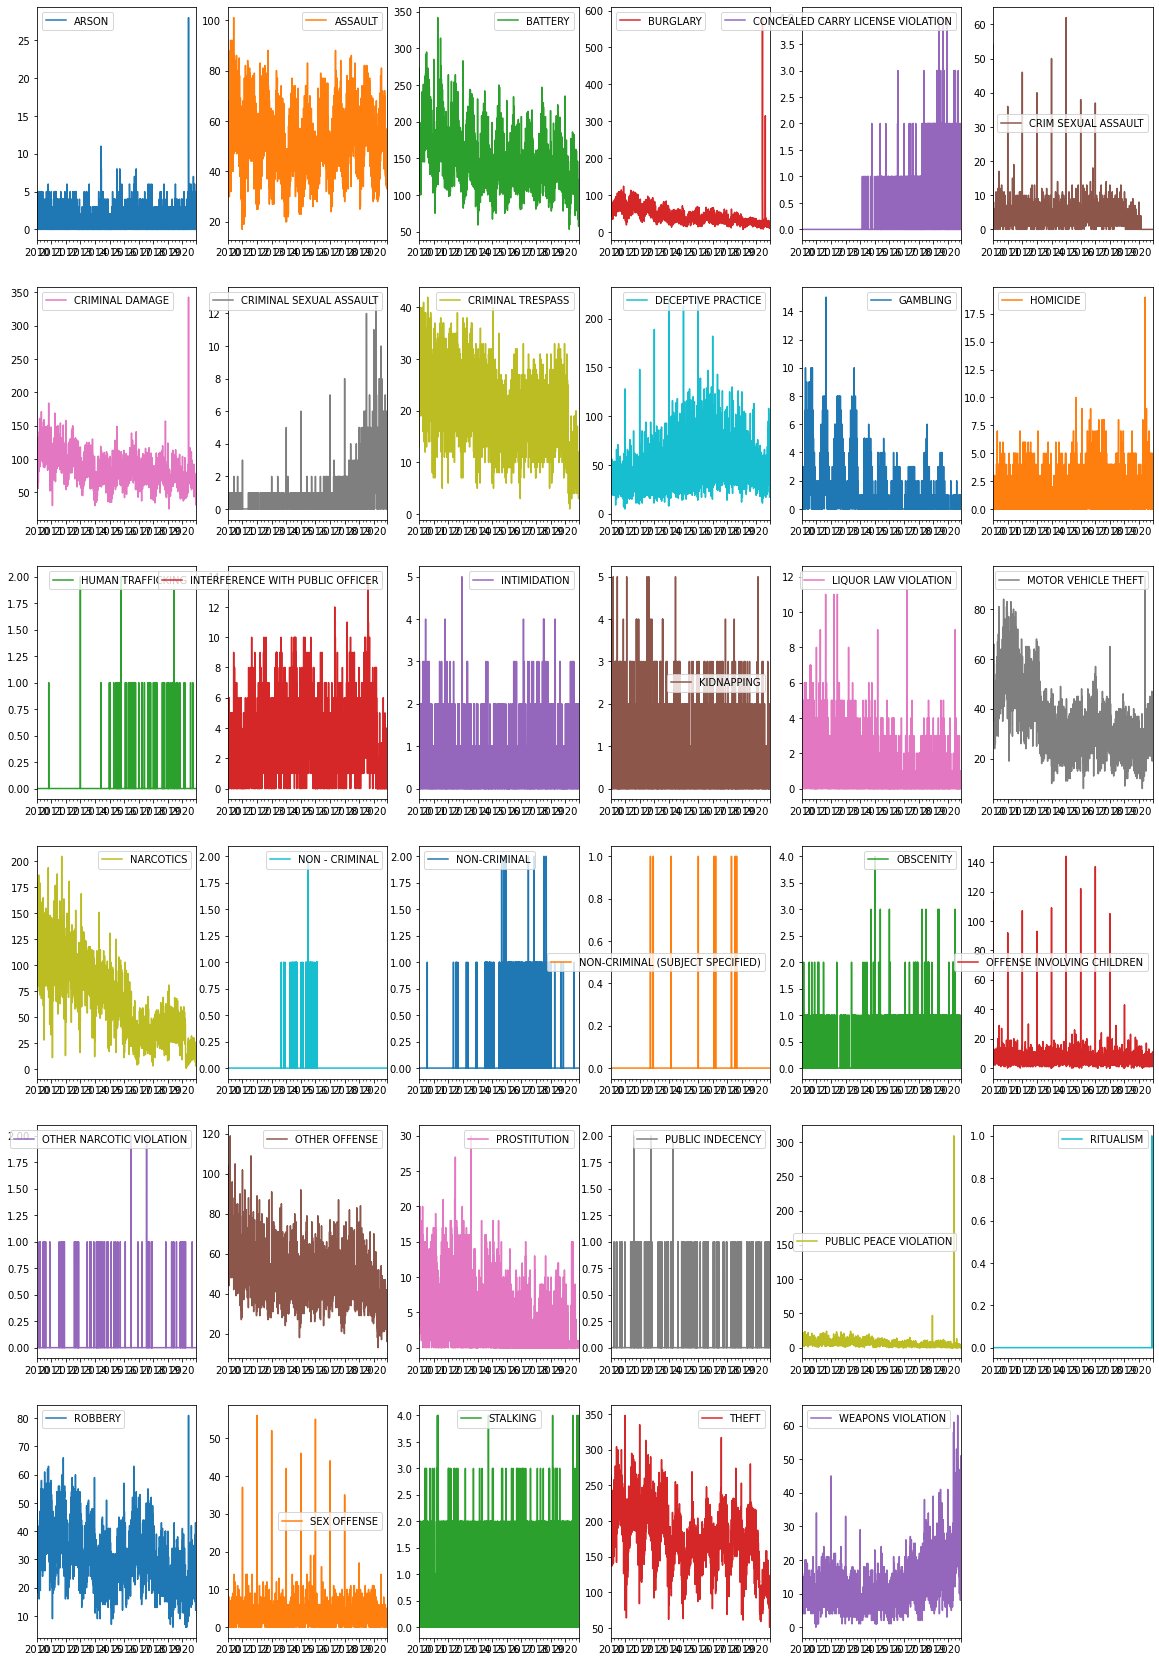

In [105]:
#visualization of of different types of crimes per month
Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

# Analysis of Arrest 

<AxesSubplot:xlabel='Month'>

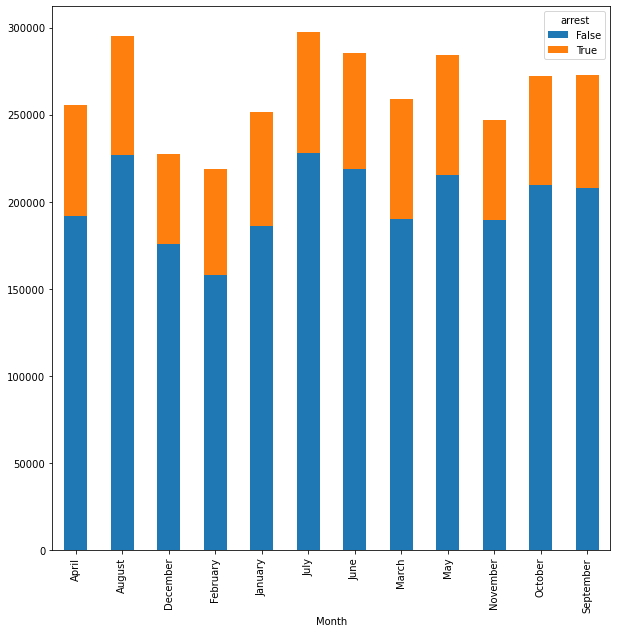

In [9]:
#Analysis of Arrest in Month wise

sample_df=crime_df[['arrest','Month']]
sample_df.groupby(["Month","arrest"])["arrest"].count().unstack('arrest').plot(kind='bar', stacked=True,figsize=(10,10))



 Here we have analysed arrest of each month . True indicate arrest was made and false indicate not made.

in this visualization we can see that the cout of False is very high


<AxesSubplot:xlabel='primary_type'>

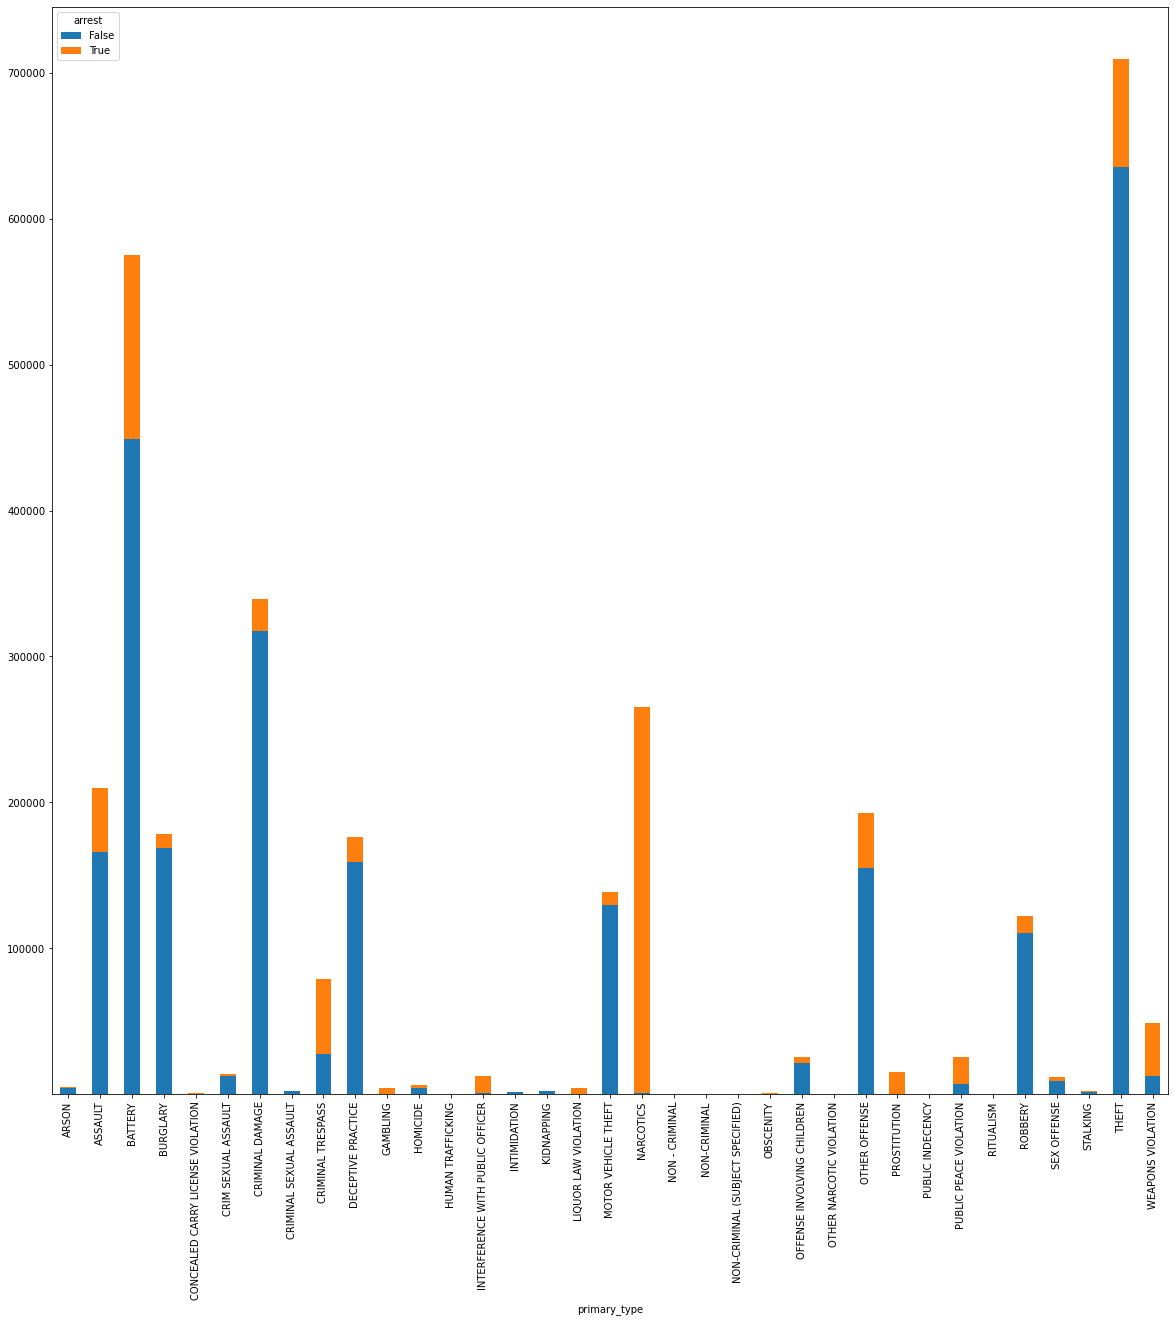

In [13]:
#Analysis of arrest in Primary_type wise
sample_df=crime_df[['arrest','primary_type']]
sample_df.groupby(["primary_type","arrest"])["arrest"].count().unstack('arrest').plot(kind='bar', stacked=True,figsize=(20,20))


Here wecan see that narcotics has more number of arrest

<AxesSubplot:title={'center':'percentage of arrest'}, ylabel='arrest'>

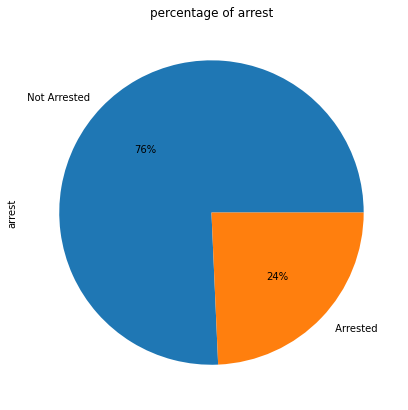

In [37]:
#visualization of percentage of arrest using pie chart
arrest_df = crime_df['arrest'].value_counts()
arrest_percentage = (arrest_df / crime_df['arrest'].sum()) * 100 
## Rename True and False to  Arrested and Not Arrested
arrest_percentage.rename({True: ' Arrested', False: ' Not Arrested'},inplace=True)

arrest_percentage.plot(kind='pie',figsize=(7,7),title='percentage of arrest', autopct='%1.0f%%')

in pie chart representation we can see that 76% of crimes has  no arrest 

In [ ]:
#Arrest percentages per year(Successful)

In [46]:
arrest_per_year = crime_df.groupby('year')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

arrest  Counts  Percentage
year                            
2010   False  269900   72.865990
2010    True  100506   27.134010
2011   False  255619   72.643593
2011    True   96262   27.356407
2012   False  245533   73.042472
2012    True   90618   26.957528
2013   False  220814   71.853595
2013    True   86497   28.146405
2014   False  195983   71.119135
2014    True   79587   28.880865
2015   False  194482   73.538175
2015    True   69982   26.461825
2016   False  216520   80.347037
2016    True   52961   19.652963
2017   False  216135   80.438488
2017    True   52561   19.561512
2018   False  214509   79.964586
2018    True   53746   20.035414
2019   False  204480   78.506955
2019    True   55981   21.493045
2020   False  163480   84.111957
2020    True   30880   15.888043

Text(0.5, 1.0, 'Percentage of unsuccessful arrest')

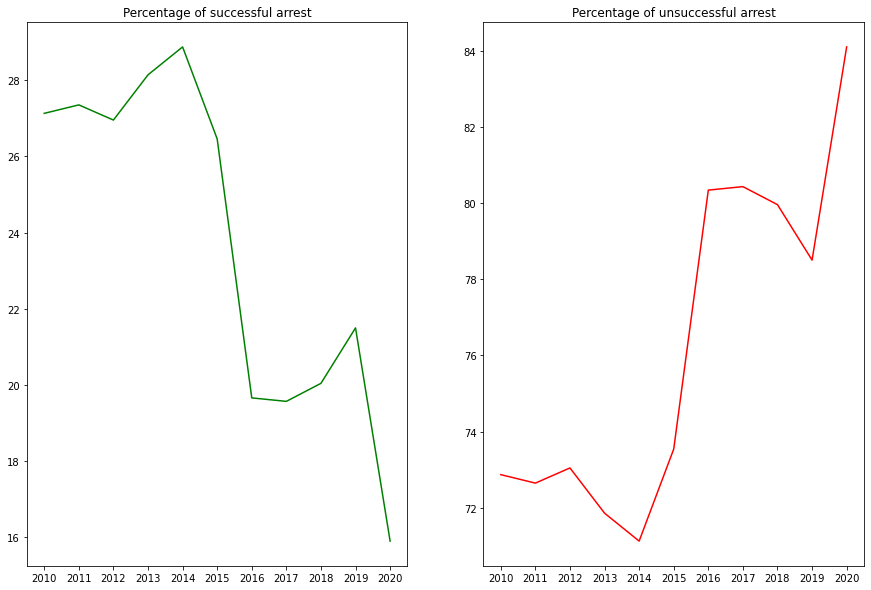

In [60]:
X=arrest_per_year[arrest_per_year['arrest'] == True]['Percentage']
Y=arrest_per_year[arrest_per_year['arrest'] == False]['Percentage']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.plot(X,color='green')
ax1.set_title("Percentage of successful arrest")


ax2.plot(Y,color='red')
ax2.set_title("Percentage of unsuccessful arrest")


In the above visualizations year 2013 to 2015 arrest rate is high

2016 to 2020 unsuccesful arrest percentage is high

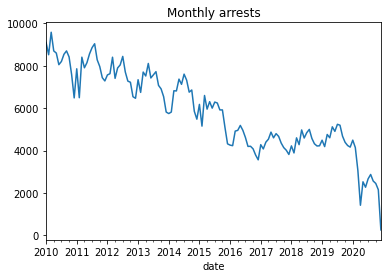

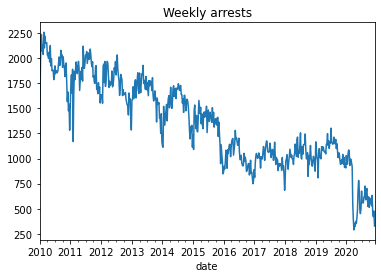

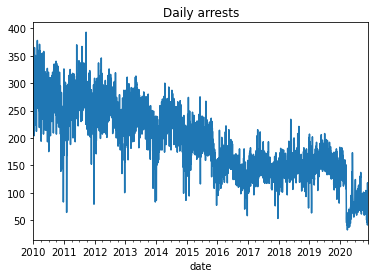

In [108]:
#plotted arrest on basis of month,week and day
Arrest = crime_df[crime_df['arrest'] == True]['arrest']
plt.subplot()



# Monthly arrest
Arrest.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

# Weekly arrest
Arrest.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

# daily arrest
Arrest.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

Here we can see that a downword trend on arrest. in all cases successful arrest rate is decreasing 

# Analysis of location description

Description of the location where the incident occurred.

In [65]:
#visualization of top 20 location , happened more number of crimes

crime_desc_order=crime_df["location_description"].value_counts().iloc[:20].index
crime_desc_order

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SMALL RETAIL STORE',
       'RESTAURANT', 'RESIDENTIAL YARD (FRONT/BACK)', 'VEHICLE NON-COMMERCIAL',
       'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
       'SCHOOL, PUBLIC, BUILDING', 'DEPARTMENT STORE', 'GAS STATION',
       'GROCERY FOOD STORE', 'PARK PROPERTY', 'BAR OR TAVERN',
       'COMMERCIAL / BUSINESS OFFICE'],
      dtype='object')

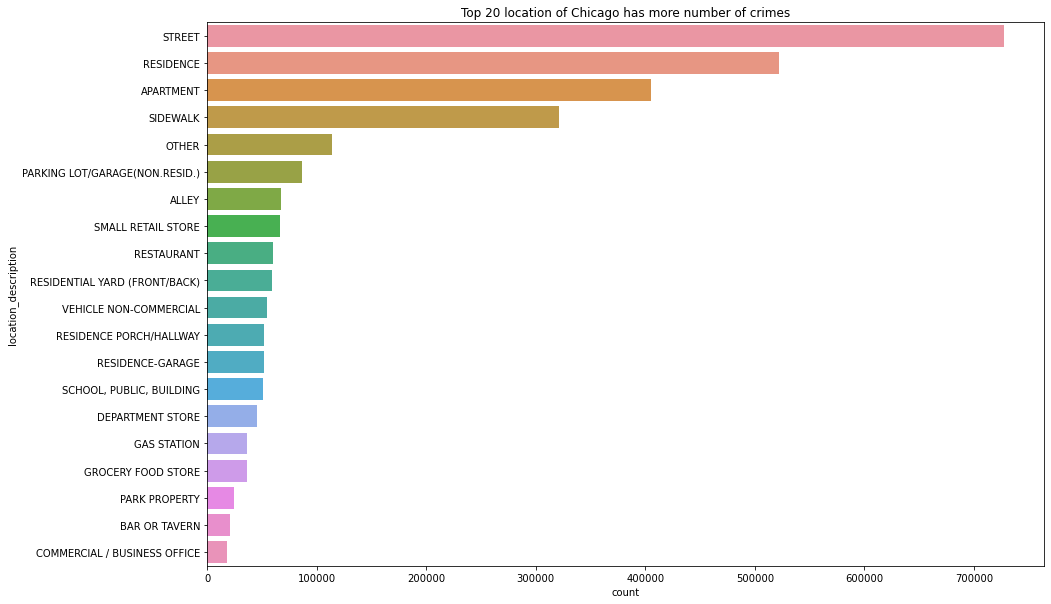

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(y='location_description',data=crime_df,order=crime_desc_order)
plt.title('Top 20 location of Chicago has more number of crimes')
plt.show()

Here we can see that most of the crimes happened street , residence and apartent

In [ ]:
# Visualization of top 10 crimes in location wise

In [75]:
filter1 = crime_df["primary_type"].isin(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'BURGLARY',
       'MOTOR VEHICLE THEFT', 'ROBBERY',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN']) 
filter2 = crime_df["location_description"].isin([ 'APARTMENT','STREET', 'RESIDENCE','ALLEY', 'SMALL RETAIL STORE',
                                                                         'RESTAURANT','SCHOOL, PUBLIC, BUILDING', 'DEPARTMENT STORE', 'GAS STATION',
       'GROCERY FOOD STORE', 'PARK PROPERTY', 'BAR OR TAVERN']) 

In [76]:
data=crime_df[filter1 & filter2] 
data.columns

Index(['ID', 'primary_type', 'description', 'location_description', 'arrest',
       'domestic', 'beat', 'community_area', 'year', 'location', 'Month',
       'Day', 'hours'],
      dtype='object')

In [77]:
datas=data.groupby(['location_description'])['primary_type'].value_counts()

<AxesSubplot:xlabel='location_description'>

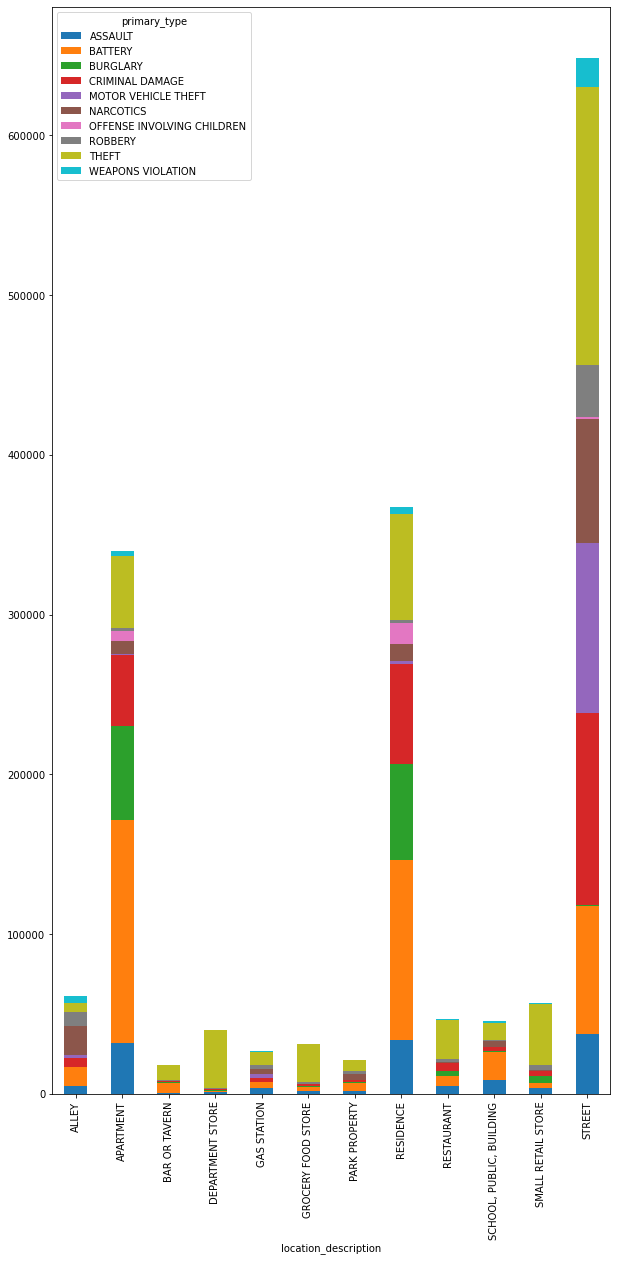

In [82]:
datas.unstack('primary_type').plot(kind='bar', stacked=True,figsize=(10,20))

# Analysis of domestic columns


Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence

In [3]:
Dom_violence_per_year = crime_df.groupby('year')['domestic'].value_counts().rename('Counts').to_frame()
Dom_violence_per_year ['Percentage'] = (100 * Dom_violence_per_year /Dom_violence_per_year .groupby(level=0).sum())
Dom_violence_per_year.reset_index(level=[1],inplace=True)
Dom_violence_per_year

domestic  Counts  Percentage
year                              
2010     False  318531   85.995097
2010      True   51875   14.004903
2011     False  302338   85.920524
2011      True   49543   14.079476
2012     False  287535   85.537452
2012      True   48616   14.462548
2013     False  262332   85.363687
2013      True   44979   14.636313
2014     False  235021   85.285408
2014      True   40549   14.714592
2015     False  222606   84.172515
2015      True   41858   15.827485
2016     False  226339   83.990708
2016      True   43142   16.009292
2017     False  225919   84.079778
2017      True   42777   15.920222
2018     False  224334   83.627146
2018      True   43921   16.372854
2019     False  217309   83.432452
2019      True   43152   16.567548
2020     False  157712   81.144268
2020      True   36648   18.855732

Text(0.5, 1.0, 'Percentage of non domestic violence')

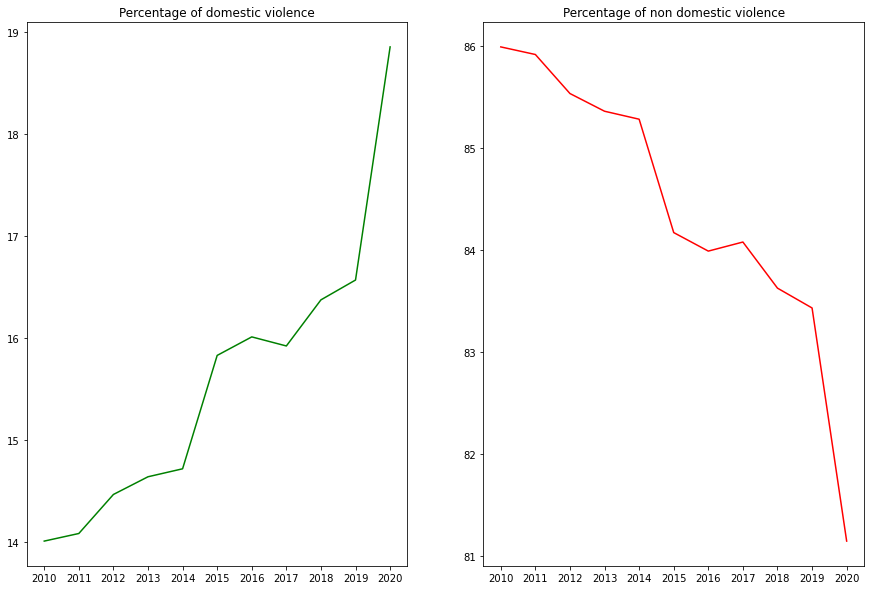

In [98]:
X=Dom_violence_per_year [Dom_violence_per_year ['domestic'] == True]['Percentage']
Y=Dom_violence_per_year [Dom_violence_per_year ['domestic'] == False]['Percentage']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.plot(X,color='green')
ax1.set_title("Percentage of domestic violence")


ax2.plot(Y,color='red')
ax2.set_title("Percentage of non domestic violence")

<AxesSubplot:xlabel='domestic'>

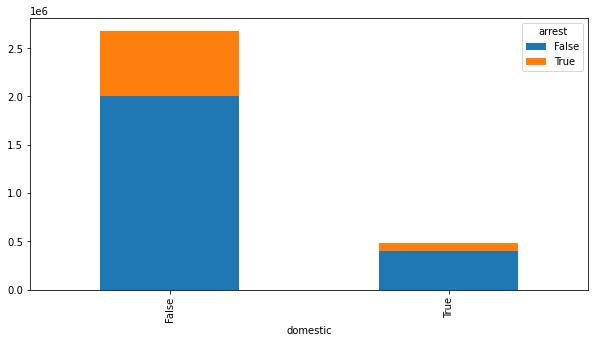

In [104]:
#visualize suuccessfull arrest rate of domestic violence
sample_df=crime_df[['arrest','domestic']]
sample_df.groupby(["arrest","domestic"])["arrest"].count().unstack('arrest').plot(kind='bar', stacked=True,figsize=(10,5))

Text(0, 0.5, 'Number of Crimes')

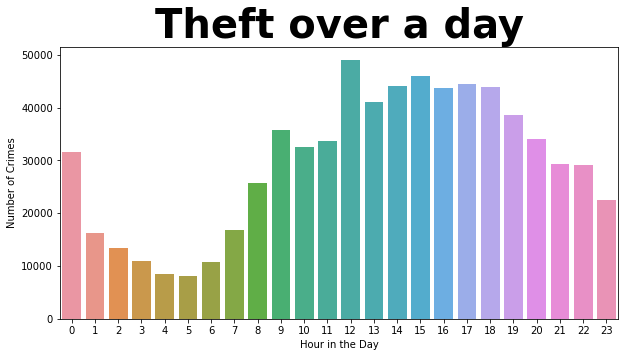

In [39]:
# analyse of theft crime over a day
Theft_df = crime_df[crime_df['primary_type']=='THEFT']
Hour = [int(x) for x in list(Theft_df['hours'].unique())]
Hour= sorted(Hour)


crime_count = list(Theft_df['hours'].value_counts().sort_index())


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour, y=crime_count)

plt.title("Theft over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")



Text(0, 0.5, 'Number of Crimes')

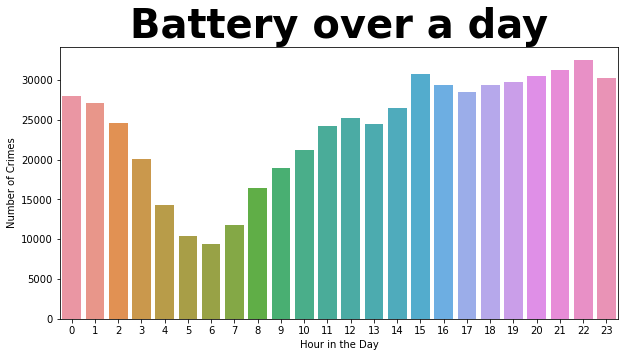

In [57]:
Battery_df=crime_df[crime_df['primary_type']=='BATTERY']
Hour2 = [int(x) for x in list(Battery_df['hours'].unique())]
Hour2= sorted(Hour2)

crime_count2 = list(Battery_df['hours'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour2, y=crime_count2)
plt.title("Battery over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

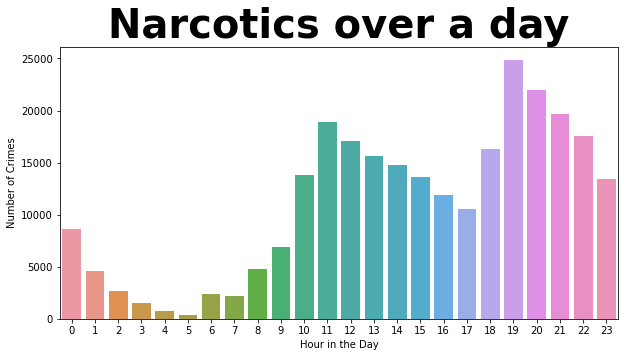

In [58]:
Narcotics_df=crime_df[crime_df['primary_type']=='NARCOTICS']
Hour3 = [int(x) for x in list(Narcotics_df['hours'].unique())]
Hour3= sorted(Hour3)

crime_count3 = list(Narcotics_df['hours'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour3, y=crime_count3)
plt.title("Narcotics over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

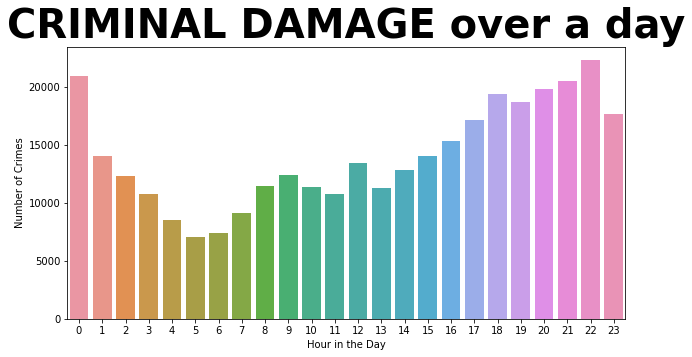

In [5]:
Criminal_df=crime_df[crime_df['primary_type']=='CRIMINAL DAMAGE']
Hour4 = [int(x) for x in list(Criminal_df['hours'].unique())]
Hour4= sorted(Hour4)

crime_count4 = list(Criminal_df['hours'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour4, y=crime_count4)
plt.title("CRIMINAL DAMAGE over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

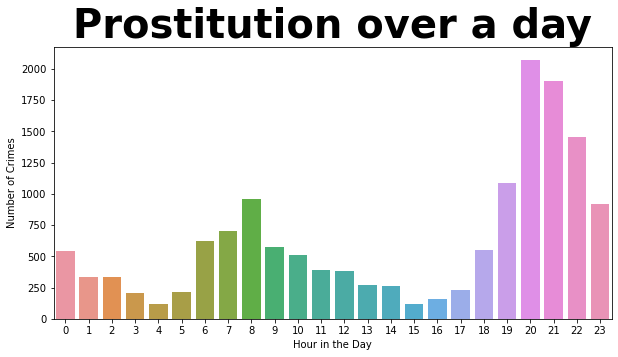

In [10]:
df=crime_df[crime_df['primary_type']=='PROSTITUTION']
Hour3 = [int(x) for x in list(df['hours'].unique())]
Hour3= sorted(Hour3)

crime_count3 = list(df['hours'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour3, y=crime_count3)
plt.title("Prostitution over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

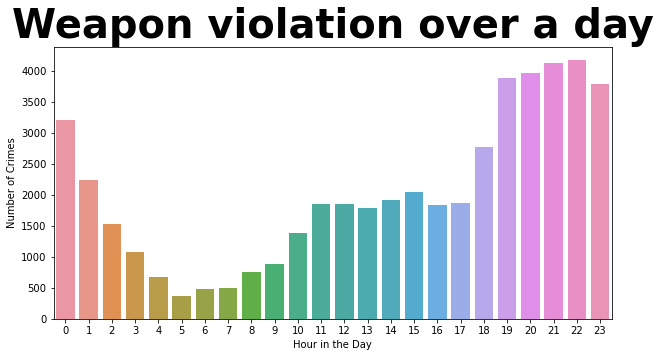

In [11]:
df=crime_df[crime_df['primary_type']=='WEAPONS VIOLATION']
Hour3 = [int(x) for x in list(df['hours'].unique())]
Hour3= sorted(Hour3)

crime_count3 = list(df['hours'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=Hour3, y=crime_count3)
plt.title("Weapon violation over a day", fontdict={'fontsize': 40}, weight="bold")
plt.xlabel("Hour in the Day")
plt.ylabel("Number of Crimes")

In [4]:
crime_df["primary_type"].value_counts()

THEFT                                709817
BATTERY                              575193
CRIMINAL DAMAGE                      339019
NARCOTICS                            265031
ASSAULT                              209909
OTHER OFFENSE                        192323
BURGLARY                             178418
DECEPTIVE PRACTICE                   175990
MOTOR VEHICLE THEFT                  138218
ROBBERY                              121874
CRIMINAL TRESPASS                     79118
WEAPONS VIOLATION                     48903
OFFENSE INVOLVING CHILDREN            25458
PUBLIC PEACE VIOLATION                25320
PROSTITUTION                          14918
CRIM SEXUAL ASSAULT                   13852
INTERFERENCE WITH PUBLIC OFFICER      12555
SEX OFFENSE                           11715
HOMICIDE                               6049
ARSON                                  4966
GAMBLING                               4434
LIQUOR LAW VIOLATION                   4136
KIDNAPPING                      

In [83]:
New_crime_data = pd.DataFrame(crime_df.resample("M").size(),columns=["Number_of_cases"])


In [84]:
New_crime_data["Month"] = New_crime_data.index.month.astype(str)
New_crime_data["Year"] = New_crime_data.index.year.astype(str)
New_crime_data["Year-Month"] = New_crime_data["Year"].str.cat(New_crime_data["Month"].str.zfill(2), sep="-")
New_crime_data

Number_of_cases Month  Year Year-Month
date                                              
2010-01-31            29234     1  2010    2010-01
2010-02-28            24947     2  2010    2010-02
2010-03-31            32337     3  2010    2010-03
2010-04-30            31675     4  2010    2010-04
2010-05-31            33406     5  2010    2010-05
...                     ...   ...   ...        ...
2020-08-31            19642     8  2020    2020-08
2020-09-30            17649     9  2020    2020-09
2020-10-31            18037    10  2020    2020-10
2020-11-30            15810    11  2020    2020-11
2020-12-31             1832    12  2020    2020-12

[132 rows x 4 columns]

In [85]:
#visualize Number of cases per Year x months using bar plot
fig = px.bar(
    New_crime_data,
    x="Year-Month",
    y="Number_of_cases",
    hover_data=["Year", "Month", "Number_of_cases"],
    color="Number_of_cases",
    text="Number_of_cases",
    height=600,
    width=2400,
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

In [68]:
#Agregate by Months
fig = px.bar(
    New_crime_data,
    x="Month",
    y="Number_of_cases",
    hover_data=["Year", "Month", "Number_of_cases"],
    color="Number_of_cases",
    text="Number_of_cases",
    height=600,
    width=1500,
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
fig.show()

In [69]:
#Agregate by Year
fig = px.bar(
    New_crime_data,
    x="Year",
    y="Number_of_cases",
    hover_data=["Year", "Month", "Number_of_cases"],
    color="Number_of_cases",
    text="Number_of_cases",
    height=600,
    width=1500,
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

fig.show()

# Forecasting

In [70]:
New_crime_data

Number_of_cases Month  Year Year-Month
date                                              
2010-01-31            29234     1  2010    2010-01
2010-02-28            24947     2  2010    2010-02
2010-03-31            32337     3  2010    2010-03
2010-04-30            31675     4  2010    2010-04
2010-05-31            33406     5  2010    2010-05
...                     ...   ...   ...        ...
2020-07-31            19362     7  2020    2020-07
2020-08-31            19620     8  2020    2020-08
2020-09-30            17622     9  2020    2020-09
2020-10-31            17987    10  2020    2020-10
2020-11-30            14656    11  2020    2020-11

[131 rows x 4 columns]

In [71]:
#Create a pickle file for forecast_data
with open("New_crime_data.pkl", "wb") as picklefile:
         pickle.dump(New_crime_data, picklefile)

In [72]:
forecast_data=New_crime_data["Number_of_cases"]


In [73]:
#Create a pickle file for forecast_data
with open("forecast_data.pkl", "wb") as picklefile:
         pickle.dump(forecast_data, picklefile)

In [40]:
forecast_df=pd.read_pickle("forecast_data.pkl")
forecast_df

date
2010-01-31    29234
2010-02-28    24947
2010-03-31    32337
2010-04-30    31675
2010-05-31    33406
              ...  
2020-07-31    19362
2020-08-31    19620
2020-09-30    17622
2020-10-31    17987
2020-11-30    14656
Freq: M, Name: Number_of_cases, Length: 131, dtype: int64

In [5]:
forecast_df.tail()

date
2020-07-31    19362
2020-08-31    19620
2020-09-30    17622
2020-10-31    17987
2020-11-30    14656
Freq: M, Name: Number of cases, dtype: int64

In [6]:
forecast_df.describe()

count      131.000000
mean     24151.648855
std       4405.164747
min      12763.000000
25%      21105.500000
50%      23690.000000
75%      26792.500000
max      34155.000000
Name: Number of cases, dtype: float64

# Line plot for Time Seires data

<AxesSubplot:xlabel='date'>

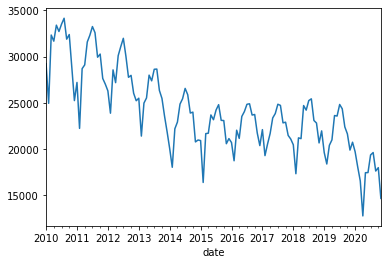

In [7]:
forecast_df.plot()


# Histogram for Time series data

<AxesSubplot:>

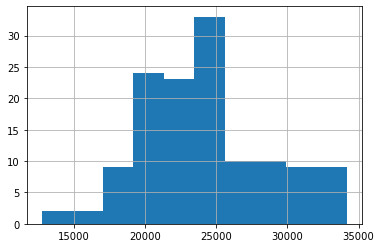

In [8]:
forecast_df.hist()

# Density plot for time series data

<AxesSubplot:ylabel='Density'>

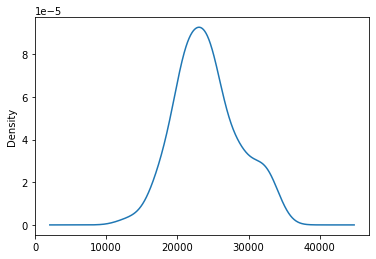

In [9]:
forecast_df.plot(kind='kde')

# QQ plot

uantile-Quantile plot

It is used to determine whether a data set is distributed a certain way

it usually showcases how the data fits a normal distribution

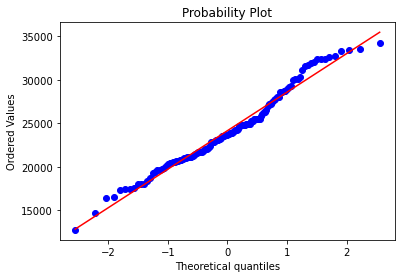

In [40]:
import scipy.stats
import pylab

scipy.stats.probplot(forecast_df,plot=pylab)
pylab.show()

# separate out a validation dataset


In [18]:
split_point=len(forecast_df)-10
dataset, validation= forecast_df[0:split_point],forecast_df[split_point:]
print("Dataset %d, Validation %d" %(len(dataset),len(validation)))
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv",header=False)

Dataset 121, Validation 10


# Persistence / Base model

In [41]:
#evaluate base model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

#load data
train=read_csv("dataset.csv",header=None,index_col=0,parse_dates=True,squeeze=True)

#Prepare data
X=train.values
X=X.astype('float32')
train_size=int(len(X)*0.70)
train,test=X[0:train_size],X[train_size:]

In [42]:
train_size

84

In [43]:
test

array([22101., 19288., 20549., 21679., 23365., 23843., 24848., 24724.,
       22833., 22905., 21474., 21084., 20460., 17328., 21210., 21127.,
       24707., 24211., 25244., 25435., 23092., 22814., 20662., 21963.,
       19625., 18381., 20404., 20993., 23625., 23573., 24824., 24355.,
       22394., 21639., 19888., 20739., 19709.], dtype=float32)

In [44]:
#validate the data
history=[x for x in train]
predictions=list()
for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
    
#observation
    obs=test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat,obs))

#report of performance
RMSE1=sqrt(mean_squared_error(test,predictions))
RMSE1
#print("RMSE5:%.3f" % rmse5)

>Predicted=20374.000, Expected=22101.000
>Predicted=22101.000, Expected=19288.000
>Predicted=19288.000, Expected=20549.000
>Predicted=20549.000, Expected=21679.000
>Predicted=21679.000, Expected=23365.000
>Predicted=23365.000, Expected=23843.000
>Predicted=23843.000, Expected=24848.000
>Predicted=24848.000, Expected=24724.000
>Predicted=24724.000, Expected=22833.000
>Predicted=22833.000, Expected=22905.000
>Predicted=22905.000, Expected=21474.000
>Predicted=21474.000, Expected=21084.000
>Predicted=21084.000, Expected=20460.000
>Predicted=20460.000, Expected=17328.000
>Predicted=17328.000, Expected=21210.000
>Predicted=21210.000, Expected=21127.000
>Predicted=21127.000, Expected=24707.000
>Predicted=24707.000, Expected=24211.000
>Predicted=24211.000, Expected=25244.000
>Predicted=25244.000, Expected=25435.000
>Predicted=25435.000, Expected=23092.000
>Predicted=23092.000, Expected=22814.000
>Predicted=22814.000, Expected=20662.000
>Predicted=20662.000, Expected=21963.000
>Predicted=21963

1679.8255861844705

here RMSE value is very high, so this naive model is not a good model

# Test WHITE NOISE

White noise is an important concept in time series forecasting.

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

A time series is white noise if the variables are independent and identically distributed with a mean of zero.

It is important for two main reasons:

Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.

Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.

White noise time series is defined by a zero mean, constant variance, and no auto correlation.

If your time series is white noise, it cannot be predicted, and if your forecast residuals are not white noise, you may be able to improve your model.

The statistics and diagnostic plots you can use on your time series to check if it is white noise

In [109]:
New_crime_data=pd.read_pickle("New_crime_data.pkl")
New_crime_data.head()

Number_of_cases Month  Year Year-Month
date                                              
2010-01-31            29234     1  2010    2010-01
2010-02-28            24947     2  2010    2010-02
2010-03-31            32337     3  2010    2010-03
2010-04-30            31675     4  2010    2010-04
2010-05-31            33406     5  2010    2010-05

In [69]:
white_noice=np.random.normal(loc=New_crime_data.Number_of_cases.mean(),scale=New_crime_data.Number_of_cases.std(),size=len(New_crime_data))
New_crime_data["white_noice"]= white_noice

In [70]:
New_crime_data.describe()

Number_of_cases   white_noice
count       131.000000    131.000000
mean      24151.648855  24334.454958
std        4405.164747   4193.736020
min       12763.000000  14487.025250
25%       21105.500000  21629.339011
50%       23690.000000  24468.638848
75%       26792.500000  27324.937881
max       34155.000000  35636.232406

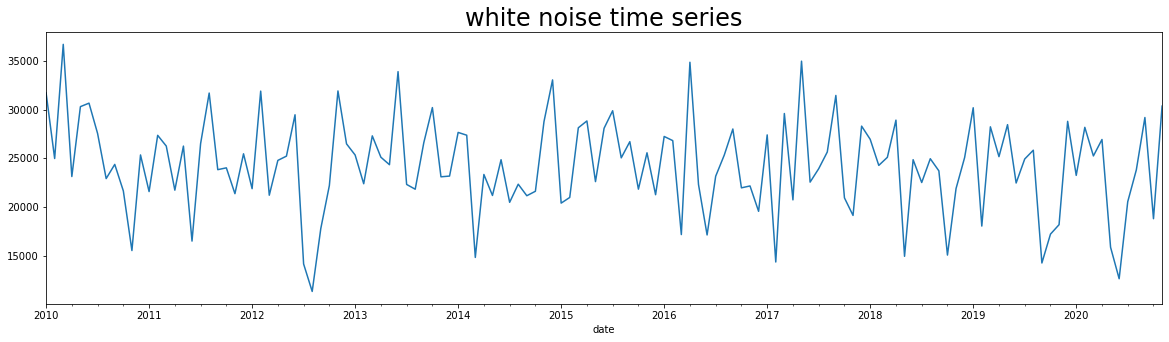

In [77]:
New_crime_data.white_noice.plot(figsize=(20,5))
plt.title("white noise time series",size=24)
plt.show()

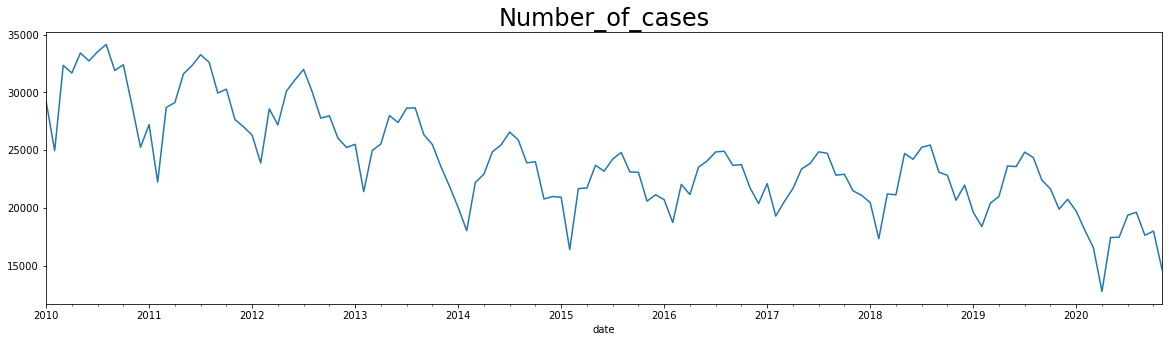

In [78]:
New_crime_data.Number_of_cases.plot(figsize=(20,5))
plt.title("Number_of_cases",size=24)
plt.show()

In [81]:
#    Sample autocorrelation (As used in statistics with normalization)

In [79]:
def sac(x, k=1):


    
    try:
        res = []
        for ki in k:
            res.append(sac(x, ki))
        return np.array(res)
    except:
        pass
    mx = np.mean(x)
    if k==0:
        N = np.sum((x-mx)*(x-mx))
    else:
        N = np.sum((x[:-k]-mx)*(x[k:]-mx))
    D = len(x) * np.var(x)
    return N/D

Text(0.5, 0, 'Lag')

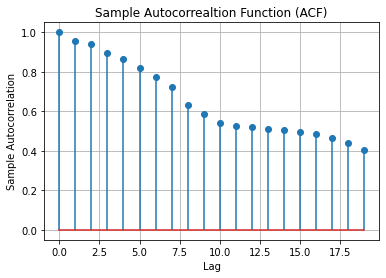

In [80]:
x = New_crime_data["Number_of_cases"]
h = 20 # Number of lags
lags = range(h)
sa = np.zeros((h))
for k in range(len(lags)):
    sa[k] = sac(x, k)
plt.figure()
markerline, stemlines, baseline = plt.stem(lags, sa)
plt.grid()
plt.title('Sample Autocorrealtion Function (ACF)')
plt.ylabel('Sample Autocorrelation')
plt.xlabel('Lag')

Conclusion:

Here we check mean standard deviation and autocorrelation, in auto correlation graph we can see that the data is correlated

and also the graph follows some patterns, this would indicates that the presence of white noise

In [82]:
# to confirm the white noise we can perform  ljungbox test
# so we have to perform hypothesis testing

Null Hypothesis(H0) : There is no autocorrelation between the signal and its lagged version

Alternate Hypothesis(H1) : There is significant autocorrelation between the signal and its lagged version

In [83]:
def ljungbox(x, lags, alpha=0.1):
    """
    The Ljung-Box test for determining if the data is independently distributed.
    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : int
        Number of lags being tested
       
    Returns
    -------
    Q : float
        Test statistic
    """
    n = len(x)
    Q = 0
    for k in range(1, lags+1):
        Q += (sac(x, k)**2) / (n-k)
    Q = n*(n+2)*Q
    return Q

In [84]:
def boxpierce(x, lags, alpha=0.1):
    """
    The Box-Pierce test for determining if the data is independently distributed.
    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : int
        Number of lags being tested
       
    Returns
    -------
    Q : float
        Test statistic
    """
    n = len(x)
    Q = 0
    for k in range(1, lags+1):
        Q += (sac(x, k)**2)
    Q = n*Q
    return Q

In [85]:
def lbqtest(x, lags, alpha=0.1, method='lb'):
    """
    The Ljung-Box test for determining if the data is independently distributed.
    Parameters
    ----------
    x : 1d numpy array
        Signal to test
    lags : list of ints
        Lags being tested
    alpha : float
        Significance level used for the tests
    method : string
        Can be either 'lb' for Ljung-Box, or 'bp' for Box-Pierce
       
    Returns
    -------
    h : np array
        Numpy array of bool values, True == H0 hypothesis rejected
    pV : np array
        Test statistics p-values
    Q : np array
        Test statistics
    cV : np array
        Critical values used for determining if H0 should be rejected. The
        critical values are calculated from the given alpha and lag.
    """
    if method=='lb':
        findq = ljungbox
    else:
        findq = boxpierce
    n = len(x)
    Q = np.zeros(len(lags))
    pV = np.zeros(len(lags))
    cV = np.zeros(len(lags))
    for i, lag in enumerate(lags):
        Q[i] = findq(x, lag)
        pV[i] = 1.0 - scipy.stats.chi2.cdf(Q[i], lag)
        cV[i] = scipy.stats.chi2.ppf(1-alpha, lag)
    h = Q>cV
    return h, pV, Q, cV

In [86]:
h, pV, Q, cV = lbqtest(x, range(1, 20), alpha=0.1)
print ('lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print ("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

lag   p-value          Q    c-value   rejectH0
1       0.000    121.981      2.706      True
2       0.000    240.993      4.605      True
3       0.000    350.086      6.251      True
4       0.000    452.655      7.779      True
5       0.000    546.002      9.236      True
6       0.000    629.662     10.645      True
7       0.000    702.935     12.017      True
8       0.000    759.346     13.362      True
9       0.000    808.120     14.684      True
10      0.000    850.547     15.987      True
11      0.000    890.732     17.275      True
12      0.000    930.475     18.549      True
13      0.000    968.894     19.812      True
14      0.000   1007.042     21.064      True
15      0.000   1044.100     22.307      True
16      0.000   1080.027     23.542      True
17      0.000   1113.053     24.769      True
18      0.000   1142.675     25.989      True
19      0.000   1168.235     27.204      True


after performing ljungbox test we can see that result is reject null hypothesis that mean there is some autocorrelation between the data

# ARIMA MODEL

In [2]:
crime_df=pd.read_pickle("crime_df.pkl")
crime_df.head()

ID                primary_type  \
date                                               
2014-05-10  11254300          DECEPTIVE PRACTICE   
2017-12-27  11500786          DECEPTIVE PRACTICE   
2015-12-01  11518563  OFFENSE INVOLVING CHILDREN   
2019-05-22  11695742               OTHER OFFENSE   
2019-06-02  11710432           CRIMINAL TRESPASS   

                                    description    location_description  \
date                                                                      
2014-05-10  FINANCIAL IDENTITY THEFT OVER $ 300                     NaN   
2017-12-27       FINAN EXPLOIT-ELDERLY/DISABLED               RESIDENCE   
2015-12-01        AGG CRIM SEX ABUSE FAM MEMBER               APARTMENT   
2019-05-22       HARASSMENT BY ELECTRONIC MEANS               RESIDENCE   
2019-06-02                           TO VEHICLE  DRIVEWAY - RESIDENTIAL   

            arrest  domestic  beat  community_area  year  \
date                                                       
2014-05-10   False     False   533            54.0  2014   
2017-12-27   False     False  2221            72.0  2017   
2015-12-01   False      True   433            55.0  2015   
2019-05-22   False     False  1622            11.0  2019   
2019-06-02   False     False  1621            12.0  2019   

                                 location     Month        Day  hours  
date                                                                   
2014-05-10                            NaN       May   Saturday     13  
2017-12-27                            NaN  December  Wednesday     12  
2015-12-01                            NaN  December    Tuesday      0  
2019-05-22  (41.969398556, -87.784366127)       May  Wednesday     12  
2019-06-02  (41.984941611, -87.751467953)      June     Sunday     21

In [61]:
# Reseting the index number of rows
new_data = crime_df.resample('m').size().reset_index()
new_data

date      0
0   2010-01-31  29234
1   2010-02-28  24947
2   2010-03-31  32337
3   2010-04-30  31675
4   2010-05-31  33406
..         ...    ...
127 2020-08-31  19642
128 2020-09-30  17649
129 2020-10-31  18037
130 2020-11-30  15810
131 2020-12-31   1832

[132 rows x 2 columns]

In [64]:
new_data=new_data.set_index("date")

In [65]:
# changing the column names
new_data.columns = [ "Crime_count"]
new_data

Crime_count
date                   
2010-01-31        29234
2010-02-28        24947
2010-03-31        32337
2010-04-30        31675
2010-05-31        33406
...                 ...
2020-08-31        19642
2020-09-30        17649
2020-10-31        18037
2020-11-30        15810
2020-12-31         1832

[132 rows x 1 columns]

<AxesSubplot:xlabel='date'>

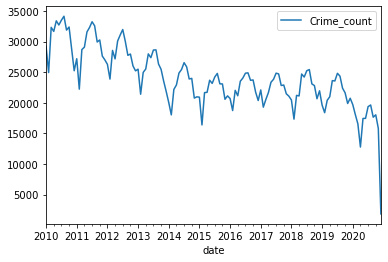

In [83]:
#visualize the data
new_data.plot()

In [84]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [85]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(count):
    result=adfuller(count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. time series Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series data is non-stationary ")

In [86]:
adfuller_test(new_data['Crime_count'])

ADF Test Statistic : 1.3803749311072282
p-value : 0.9970231390058246
#Lags Used : 12
Number of Observations Used : 119
weak evidence against null hypothesis, time series data is non-stationary 


# Differencing

In [87]:
new_data['Seasonal First Difference']=new_data['Crime_count']-new_data['Crime_count'].shift(12)

In [88]:
new_data

Crime_count  Seasonal First Difference
date                                              
2010-01-31        29234                        NaN
2010-02-28        24947                        NaN
2010-03-31        32337                        NaN
2010-04-30        31675                        NaN
2010-05-31        33406                        NaN
...                 ...                        ...
2020-08-31        19642                    -4714.0
2020-09-30        17649                    -4745.0
2020-10-31        18037                    -3603.0
2020-11-30        15810                    -4080.0
2020-12-31         1832                   -18911.0

[132 rows x 2 columns]

In [89]:
## Again test dickey fuller test
adfuller_test(new_data['Seasonal First Difference'].dropna())

ADF Test Statistic : 0.22000794994288764
p-value : 0.9733617147091843
#Lags Used : 11
Number of Observations Used : 108
weak evidence against null hypothesis, time series data is non-stationary 


In [92]:
#Estimate trend take log values of of crime data
new_data["log"]=np.log(new_data["Crime_count"])
new_data

Crime_count  Seasonal First Difference        log
date                                                         
2010-01-31        29234                        NaN  10.283088
2010-02-28        24947                        NaN  10.124509
2010-03-31        32337                        NaN  10.383967
2010-04-30        31675                        NaN  10.363283
2010-05-31        33406                        NaN  10.416491
...                 ...                        ...        ...
2020-08-31        19642                    -4714.0   9.885425
2020-09-30        17649                    -4745.0   9.778434
2020-10-31        18037                    -3603.0   9.800180
2020-11-30        15810                    -4080.0   9.668398
2020-12-31         1832                   -18911.0   7.513164

[132 rows x 3 columns]

In [93]:

#check exponential average that is passing arguments like recent data(use recent data means half life)..
#take number of change
new_data["exp_avg"]=(new_data["log"].ewm(halflife=12,min_periods=0,adjust=True).mean())
new_data

Crime_count  Seasonal First Difference        log    exp_avg
date                                                                    
2010-01-31        29234                        NaN  10.283088  10.283088
2010-02-28        24947                        NaN  10.124509  10.201509
2010-03-31        32337                        NaN  10.383967  10.265873
2010-04-30        31675                        NaN  10.363283  10.292375
2010-05-31        33406                        NaN  10.416491  10.320145
...                 ...                        ...        ...        ...
2020-08-31        19642                    -4714.0   9.885425   9.918100
2020-09-30        17649                    -4745.0   9.778434   9.910257
2020-10-31        18037                    -3603.0   9.800180   9.904075
2020-11-30        15810                    -4080.0   9.668398   9.890841
2020-12-31         1832                   -18911.0   7.513164   9.757327

[132 rows x 4 columns]

In [96]:
#remove that trends changes from original time series data
new_data["exp_diff"]=((new_data["log"])-(new_data["exp_avg"]).shift(12))
new_data

Crime_count  Seasonal First Difference        log    exp_avg  \
date                                                                       
2010-01-31        29234                        NaN  10.283088  10.283088   
2010-02-28        24947                        NaN  10.124509  10.201509   
2010-03-31        32337                        NaN  10.383967  10.265873   
2010-04-30        31675                        NaN  10.363283  10.292375   
2010-05-31        33406                        NaN  10.416491  10.320145   
...                 ...                        ...        ...        ...   
2020-08-31        19642                    -4714.0   9.885425   9.918100   
2020-09-30        17649                    -4745.0   9.778434   9.910257   
2020-10-31        18037                    -3603.0   9.800180   9.904075   
2020-11-30        15810                    -4080.0   9.668398   9.890841   
2020-12-31         1832                   -18911.0   7.513164   9.757327   

            exp_diff  
date                  
2010-01-31       NaN  
2010-02-28       NaN  
2010-03-31       NaN  
2010-04-30       NaN  
2010-05-31       NaN  
...              ...  
2020-08-31 -0.130389  
2020-09-30 -0.237422  
2020-10-31 -0.213790  
2020-11-30 -0.339055  
2020-12-31 -2.490498  

[132 rows x 5 columns]

In [97]:
## Again test dickey fuller test
adfuller_test(new_data['exp_diff'].dropna())

ADF Test Statistic : 2.6880849629123067
p-value : 0.9990862972230609
#Lags Used : 7
Number of Observations Used : 112
weak evidence against null hypothesis, time series data is non-stationary 


In [105]:
#remove the seasonal changings
new_data["shift_diff"]=((new_data["log"]) - (new_data["log"]).shift(12))
new_data

Crime_count  Seasonal First Difference        log    exp_avg  \
date                                                                       
2010-01-31        29234                        NaN  10.283088  10.283088   
2010-02-28        24947                        NaN  10.124509  10.201509   
2010-03-31        32337                        NaN  10.383967  10.265873   
2010-04-30        31675                        NaN  10.363283  10.292375   
2010-05-31        33406                        NaN  10.416491  10.320145   
...                 ...                        ...        ...        ...   
2020-08-31        19642                    -4714.0   9.885425   9.918100   
2020-09-30        17649                    -4745.0   9.778434   9.910257   
2020-10-31        18037                    -3603.0   9.800180   9.904075   
2020-11-30        15810                    -4080.0   9.668398   9.890841   
2020-12-31         1832                   -18911.0   7.513164   9.757327   

            exp_diff  shift_diff  
date                              
2010-01-31       NaN         NaN  
2010-02-28       NaN         NaN  
2010-03-31       NaN         NaN  
2010-04-30       NaN         NaN  
2010-05-31       NaN         NaN  
...              ...         ...  
2020-08-31 -0.130389   -0.215108  
2020-09-30 -0.237422   -0.238114  
2020-10-31 -0.213790   -0.182118  
2020-11-30 -0.339055   -0.229574  
2020-12-31 -2.490498   -2.426801  

[132 rows x 6 columns]

In [106]:
## Again test dickey fuller test
adfuller_test(new_data['shift_diff'].dropna())

ADF Test Statistic : 1.4024399406942116
p-value : 0.9971251980242035
#Lags Used : 11
Number of Observations Used : 108
weak evidence against null hypothesis, time series data is non-stationary 


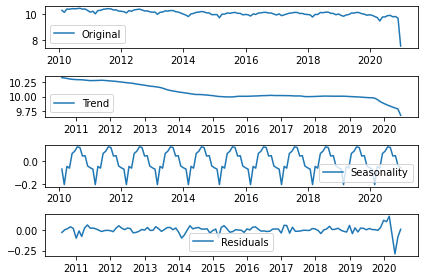

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_data["log"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_data["log"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [113]:
#take residuals and check it is stationary or not
new_data["decompose"]=residual



In [114]:
## Again test dickey fuller test
adfuller_test(new_data["decompose"].dropna())

ADF Test Statistic : -7.858808077740515
p-value : 5.3525910006678725e-12
#Lags Used : 3
Number of Observations Used : 116
strong evidence against the null hypothesis(Ho), reject the null hypothesis. time series Data  is stationary


# Autocorrelation and Partial Autocorrelation


In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#import statsmodels.api as sm


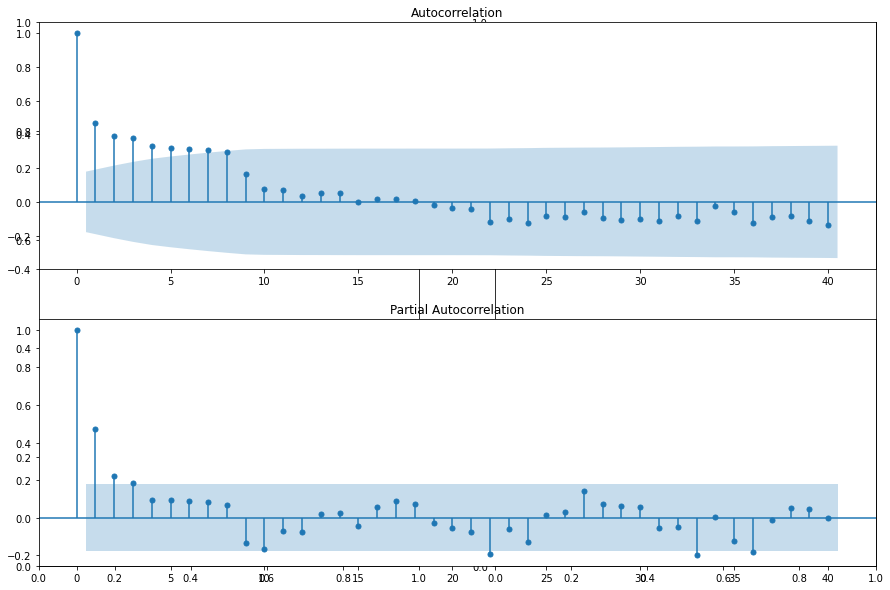

In [175]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
#p=2,q=0,d=0

In [ ]:
#ARIMA MODEL

In [173]:
#create a pickle file for new_datas

with open("new_data.pkl", "wb") as picklefile:
         pickle.dump(new_data, picklefile)

In [2]:
new_data=pd.read_pickle("new_data.pkl")

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
split_point=len(new_data)-12
new_datas= new_data[0:split_point]

test=new_data[split_point:]

In [28]:
model=ARIMA(new_datas['Crime_count'],order=(2,0,0))
model_fit=model.fit()

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [29]:
new_datas.shape

(120, 8)

<AxesSubplot:xlabel='date'>

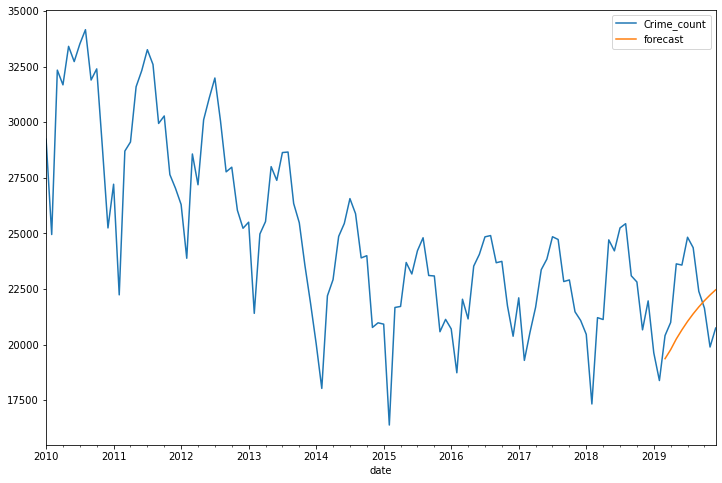

In [30]:
new_datas["forecast"]=model_fit.predict(start=110,end=140,dynamic=True)
new_datas[['Crime_count','forecast']].plot(figsize=(12,8))

In [311]:
model=ARIMA(new_datas['Crime_count'],order=(2,0,0))
model_fit=model.fit()
pred = model_fit.predict(start=109,end=120,dynamic=True)
RMSE2=sqrt(mean_squared_error(test["Crime_count"],pred))
RMSE2
#print('ARIMA model MSE:{}'.format(sqrt(mean_squared_error(test["Crime_count"],pred))))

7838.235969770973

In [31]:
#calculate MAPE
forecasts=new_datas['forecast']
actual=new_datas['Crime_count']
mape2 = np.mean(np.abs(forecasts - actual)/np.abs(actual)) 
mape2

0.08974097090511235

# SARIMAX(Seasonal ARIMAX)

In [15]:
import statsmodels.api as sm

In [16]:
model=sm.tsa.statespace.SARIMAX(new_datas['Crime_count'],order=(1, 1, 1),seasonal_order=(2,0,0,12))
results=model.fit()

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



<AxesSubplot:xlabel='date'>

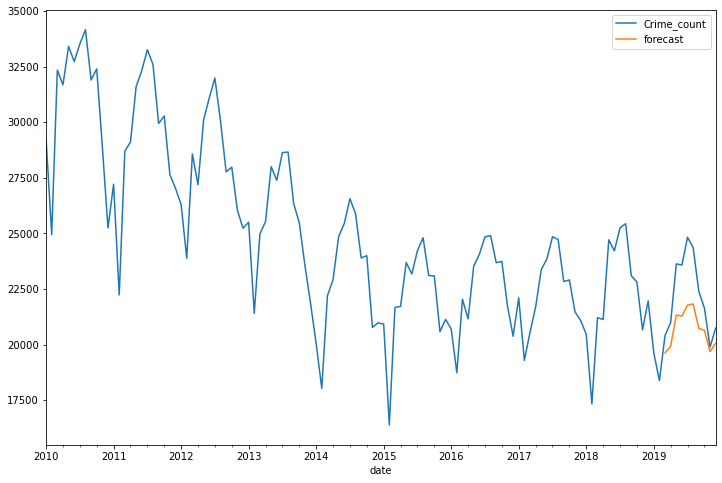

In [17]:
new_datas['forecast']=results.predict(start=110,end=120,dynamic=True)
new_datas[['Crime_count','forecast']].plot(figsize=(12,8))

In [287]:
model=sm.tsa.statespace.SARIMAX(new_datas['Crime_count'],order=(1, 1, 1),seasonal_order=(2,0,0,12))
results=model.fit()
pred = results.predict(start=109,end=120,dynamic=True)
RMSE3=sqrt(mean_squared_error(test["Crime_count"],pred))
RMSE3
#print('ARIMA model MSE:{}'.format(sqrt(mean_squared_error(test["Crime_count"],pred))))

6387.18682936665

In [25]:
#calculate error using MAPE
forecasts=new_datas['forecast']
actual=new_datas['Crime_count']
mape3 = np.mean(np.abs(forecasts - actual)/np.abs(actual)) 
mape3

0.06744990614188669

In [ ]:
#Predict future 24 months data 
#with the helpof DateOffset create a new data frame create future 24 months data concate this data with original data frame

In [288]:
from pandas.tseries.offsets import DateOffset
future_dates=[new_datas.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-29 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-30 00:00:00'),
 Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-30 00:00:00'),
 Timestamp('2020-10-31 00:00:00'),
 Timestamp('2020-11-30 00:00:00'),
 Timestamp('2020-12-31 00:00:00'),
 Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-30 00:00:00')]

In [289]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataset1.columns)
future_datest_df.shape

(23, 2)

<AxesSubplot:>

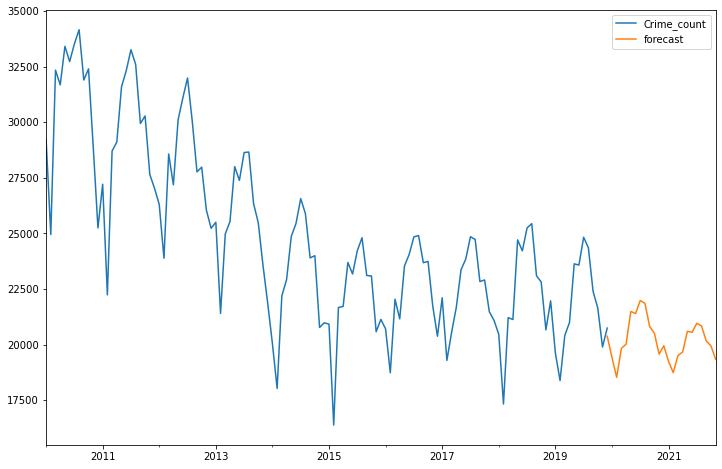

In [290]:
future_df=pd.concat([new_datas,future_datest_df])
future_df['forecast'] = results.predict(start = 119, end = 143, dynamic= True)  
future_df[['Crime_count', 'forecast']].plot(figsize=(12, 8))

# Forecast method based on smoothing

Two major forecsting methods based on smoothing

Moving averages

Exponential smoothing

Here for forecasting I am using Exponential smoothing

Following are the Exponential smoothing techniques:

Simple Exponential Method

Holt method

Holts winter exponential smoothing with additive seasonality and additive trend

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
#load data

Train = new_datas
Test = test


In [34]:
# holt is the lower error rate

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



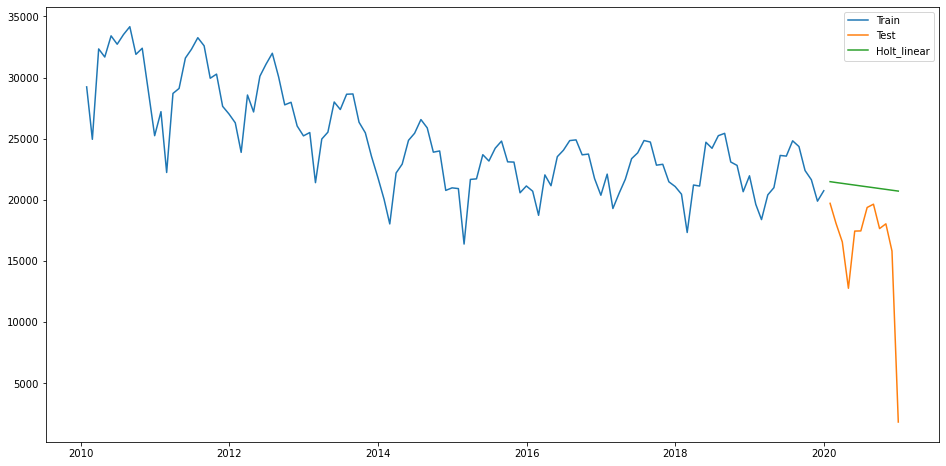

In [35]:
#Visualization
y_hat_avg = Test["Crime_count"].copy()
fit1 = Holt(Train['Crime_count']).fit(smoothing_level=0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(Test["Crime_count"]))
plt.figure(figsize=(16,8))
plt.plot(Train['Crime_count'], label='Train')
plt.plot(Test['Crime_count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [302]:
RMSE4 = sqrt(mean_squared_error(Test.Crime_count, y_hat_avg.Holt_linear))
print(RMSE4)



6719.509874303552


In [36]:
#calculate error using MAPE
forecasts=y_hat_avg['Holt_linear']
actual=Test['Crime_count']
mape4 = np.mean(np.abs(forecasts - actual)/np.abs(actual)) 
mape4

1.064590881271134

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



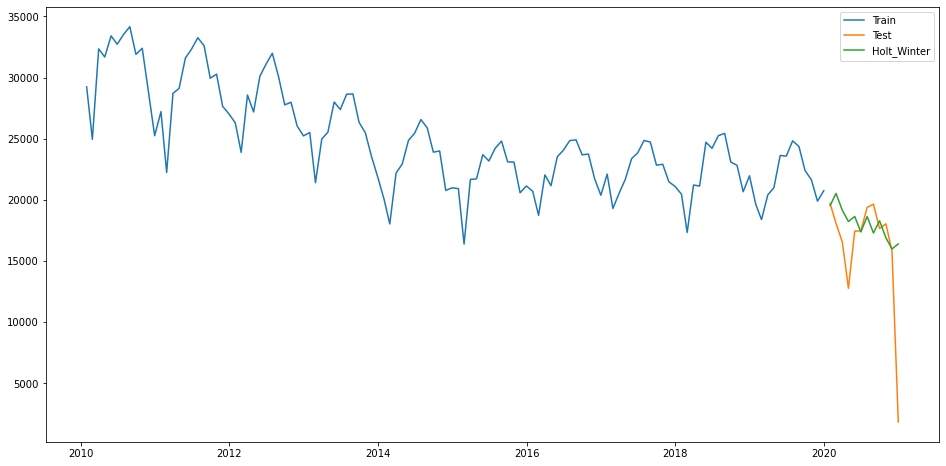

In [37]:
# Holt-Winters Method
y_hat_avg = Test["Crime_count"].copy()
fit2 = ExponentialSmoothing((Train['Crime_count']),seasonal_periods=7 ,trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit2.forecast(len(Test["Crime_count"]))
plt.figure(figsize=(16,8))
plt.plot(Train['Crime_count'], label='Train')
plt.plot(Test['Crime_count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [304]:
RMSE5 = sqrt(mean_squared_error(Test.Crime_count, y_hat_avg.Holt_Winter))
print(RMSE5)


4689.354874044111


In [39]:
#calculate error using MAPE
forecasts=y_hat_avg['Holt_Winter']
actual=Test['Crime_count']
mape5 = np.mean(np.abs(forecasts - actual)/np.abs(actual)) 
mape5

0.7516415318381041

In [47]:
data = {"MODEL":pd.Series(["ARIMA_model","SARIMA_model","HOLT_LINEAR_model,","HOLT_WINTER_model"]),"MAPE_Values":pd.Series([mape2,mape3,mape4,mape5])}
table_RMSE=pd.DataFrame(data)
table_RMSE

MODEL  MAPE_Values
0         ARIMA_model     0.089741
1        SARIMA_model     0.067450
2  HOLT_LINEAR_model,     0.751642
3   HOLT_WINTER_model     0.751642